In [2]:
!pip install jovian --upgrade --quiet
!pip install opendatasets --upgrade --quiet

     |████████████████████████████████| 71kB 8.5MB/s 


In [3]:
import time
import opendatasets as od
import numpy as np 
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)

# Dataset loading and Preprocessing

In [4]:
dataset_url="https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: supremekai40
Your Kaggle Key: ··········


  1%|▏         | 9.00M/612M [00:00<00:09, 65.4MB/s]

100%|██████████| 612M/612M [00:09<00:00, 69.0MB/s]


In [5]:
start = time.time()
image_data = []
image_labels = []
total_classes = 43
height = 43
width = 43
channels = 3
input_path = '/content/gtsrb-german-traffic-sign/'

for i in range(total_classes):
    path = input_path + 'Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
end = time.time()
print("It has taken", round(end-start,5), "seconds")

/content/gtsrb-german-traffic-sign/Train/0
/content/gtsrb-german-traffic-sign/Train/1
/content/gtsrb-german-traffic-sign/Train/2
/content/gtsrb-german-traffic-sign/Train/3
/content/gtsrb-german-traffic-sign/Train/4
/content/gtsrb-german-traffic-sign/Train/5
/content/gtsrb-german-traffic-sign/Train/6
/content/gtsrb-german-traffic-sign/Train/7
/content/gtsrb-german-traffic-sign/Train/8
/content/gtsrb-german-traffic-sign/Train/9
/content/gtsrb-german-traffic-sign/Train/10
/content/gtsrb-german-traffic-sign/Train/11
/content/gtsrb-german-traffic-sign/Train/12
/content/gtsrb-german-traffic-sign/Train/13
/content/gtsrb-german-traffic-sign/Train/14
/content/gtsrb-german-traffic-sign/Train/15
/content/gtsrb-german-traffic-sign/Train/16
/content/gtsrb-german-traffic-sign/Train/17
/content/gtsrb-german-traffic-sign/Train/18
/content/gtsrb-german-traffic-sign/Train/19
/content/gtsrb-german-traffic-sign/Train/20
/content/gtsrb-german-traffic-sign/Train/21
/content/gtsrb-german-traffic-sign/Train/2

In [6]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [7]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 43, 43, 3)
X_valid.shape (7842, 43, 43, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [36]:
#Preparing the Labels
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43, 43)
(7842, 43, 43)


#CNN Model

In [9]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random seed
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [10]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 39, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Training on Data

In [13]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs,
validation_data=(X_valid, y_valid))

Epoch 1/10
491/491 [==============================] - 12s 10ms/step - loss: 1.7570 - accuracy: 0.5300 - val_loss: 0.0834 - val_accuracy: 0.9769
Epoch 2/10
491/491 [==============================] - 4s 9ms/step - loss: 0.1416 - accuracy: 0.9555 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 3/10
491/491 [==============================] - 4s 9ms/step - loss: 0.0728 - accuracy: 0.9791 - val_loss: 0.0269 - val_accuracy: 0.9926
Epoch 4/10
491/491 [==============================] - 4s 9ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0178 - val_accuracy: 0.9957
Epoch 5/10
491/491 [==============================] - 4s 9ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0127 - val_accuracy: 0.9969
Epoch 6/10
491/491 [==============================] - 4s 9ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0210 - val_accuracy: 0.9943
Epoch 7/10
491/491 [==============================] - 4s 9ms/step - loss: 0.0378 - accuracy: 0.9892 - val_loss: 0.0161 - val_accuracy: 0.9966
Epoc

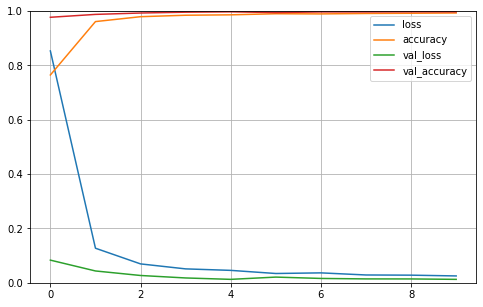

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

#Accuracy on test dataset

In [35]:
start = time.time()
test = pd.read_csv(input_path + '/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

(1, 43, 43, 3)
14


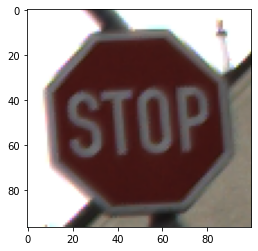

In [18]:
img_index = 93
image = Image.open('/content/gtsrb-german-traffic-sign/' + test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img)/255.
img = img.reshape(1,height,width,channels)
print(img.shape)
print(labels[img_index])
plt.imshow(image)

In [28]:
pred=np.argmax(model.predict(img), axis=-1).astype("int32")[0]
print(pred)

14


In [34]:
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(input_path + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1).astype("int32")

#Accuracy with the test data
print(accuracy_score(labels, pred))
end = time.time()
print("It has taken", round(end-start,5), "seconds")

0.9719714964370546
It has taken 4.03047 seconds
